In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('train.csv')
df_copy = df.copy()
df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0


In [3]:
df.shape

(10000, 12)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,4999.5000,2886.895680,0.0,2499.75,4999.5,7499.25,9999.0
age,10000.0,45.8780,8.043929,23.0,40.00,46.0,51.00,68.0
years_of_experience,10000.0,1.9868,1.772213,0.0,0.00,2.0,3.00,10.0
lesson_price,10000.0,1699.1050,524.886654,200.0,1300.00,1500.0,2150.00,3950.0
qualification,10000.0,1.7195,0.792264,1.0,1.00,2.0,2.00,4.0
physics,10000.0,0.3750,0.484147,0.0,0.00,0.0,1.00,1.0
chemistry,10000.0,0.1329,0.339484,0.0,0.00,0.0,0.00,1.0
biology,10000.0,0.1096,0.312406,0.0,0.00,0.0,0.00,1.0
english,10000.0,0.0537,0.225436,0.0,0.00,0.0,0.00,1.0
geography,10000.0,0.0321,0.176274,0.0,0.00,0.0,0.00,1.0


### Средний возраст участников - 45 лет; минимальный возраст 23, максимальный - 68(?) лет;

<AxesSubplot:xlabel='age'>

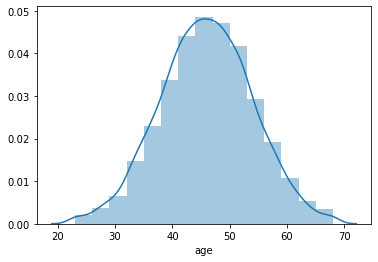

In [5]:
sns.distplot(df['age'],bins=15)

### Выглядит близко к нормальному распределению. Оставим "как есть"

### Генерация новых признаков

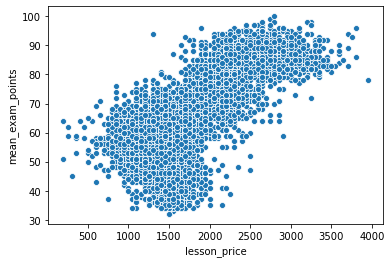

In [6]:
sns.scatterplot(df['lesson_price'],df['mean_exam_points']);

#### Видно,что в целом успеваемость учеников в какой-то степени коррелирует (положительно) со стоимостью занятий; поэтому сделаем группировку учеников по стоимости уроков, которые они оплачивают (всего будет 4 группы, согласно квартилям).

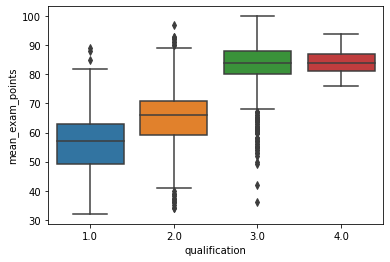

In [7]:
sns.boxplot(df['qualification'],df['mean_exam_points'],orient='v');

#### Тут показано, что имеется какая-то разница между квалификациями 1,2 и 3,4: у первой пары квалификаций успеваемость ниже, у второй - выше; этот наблюдение добавим ниже (первая пара будет под номером 1, вторая - 2)

In [8]:
df['age_group']=pd.cut(df['age'],[0,40,46,51,100],labels=[1,2,3,4]).astype('float')
df['price_group']=pd.cut(df['lesson_price'],[0,1300,1500,2150,10000],labels=[1,2,3,4]).astype('float')
df['year_age_group']=df['age']/df['years_of_experience']
quartiles = [df['year_age_group'].quantile(0),
            df['year_age_group'].quantile(0.25),
            df['year_age_group'].quantile(0.5),
            df['year_age_group'].quantile(0.75),
            df['year_age_group'].quantile(1)]
df['year_age_group'] = pd.cut(df['year_age_group'],quartiles,labels=[1,2,3,4]).astype('float')
df.head(10)

/home/andreyl/Soft/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,age_group,price_group,year_age_group
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0,1.0,2.0,3.0
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0,3.0,4.0,1.0
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,1.0,1.0,3.0
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,2.0,2.0,1.0
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,2.0,2.0,3.0
5,5,33.0,4.0,1650.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0,1.0,3.0,1.0
6,6,53.0,1.0,2100.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0,4.0,3.0,3.0
7,7,60.0,3.0,1800.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,4.0,3.0,2.0
8,8,39.0,1.0,1200.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,57.0,1.0,1.0,3.0
9,9,49.0,5.0,1750.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,3.0,3.0,1.0


#### При группировке по возрасту видна разница между 1 и 4 группами по ранее сформированным группам по цене обучения

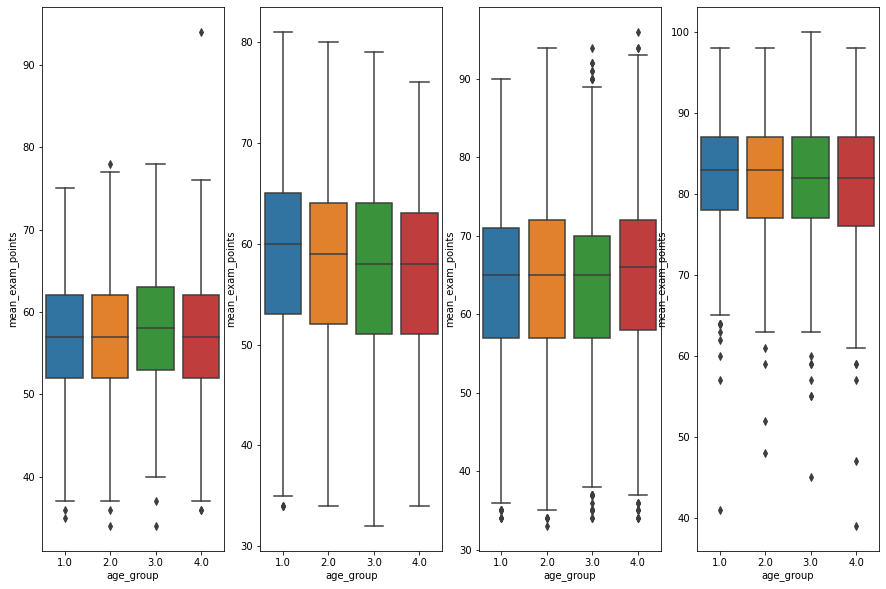

In [9]:
fig,axis = plt.subplots(1,4,figsize=(15,10))
for i in df['price_group'].unique():
    sns.boxplot(df[df['price_group']==i]['age_group'],df[df['price_group']==i]['mean_exam_points'],orient='v',ax=axis[int(i)-1])

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,4999.500000,2886.895680,0.0,2499.75,4999.5,7499.25,9999.0
age,10000.0,45.878000,8.043929,23.0,40.00,46.0,51.00,68.0
years_of_experience,10000.0,1.986800,1.772213,0.0,0.00,2.0,3.00,10.0
lesson_price,10000.0,1699.105000,524.886654,200.0,1300.00,1500.0,2150.00,3950.0
qualification,10000.0,1.719500,0.792264,1.0,1.00,2.0,2.00,4.0
physics,10000.0,0.375000,0.484147,0.0,0.00,0.0,1.00,1.0
chemistry,10000.0,0.132900,0.339484,0.0,0.00,0.0,0.00,1.0
biology,10000.0,0.109600,0.312406,0.0,0.00,0.0,0.00,1.0
english,10000.0,0.053700,0.225436,0.0,0.00,0.0,0.00,1.0
geography,10000.0,0.032100,0.176274,0.0,0.00,0.0,0.00,1.0


qualification  price_group
1.0            1.0            2380
               2.0            1664
               3.0             813
               4.0              27
2.0            3.0            1580
               2.0             750
               4.0             544
               1.0             213
3.0            4.0            1643
               3.0             303
               2.0              20
               1.0              13
4.0            4.0              40
               3.0              10
Name: price_group, dtype: int64

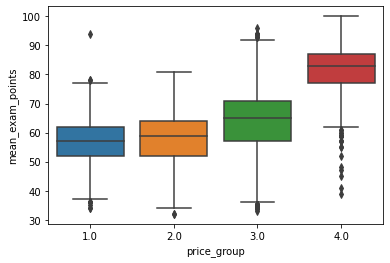

In [11]:
sns.boxplot(df['price_group'],df['mean_exam_points'],orient='v')
df.groupby('qualification')['price_group'].value_counts()

In [12]:
df['qualification_height']=pd.cut(df['qualification'],[-1,3,5],labels=[0,1]).astype('float')

df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,age_group,price_group,year_age_group,qualification_height
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0,1.0,2.0,3.0,0.0
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0,3.0,4.0,1.0,0.0
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,1.0,1.0,3.0,0.0
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,2.0,2.0,1.0,0.0
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,2.0,2.0,3.0,0.0


### Второй столбец - "годы обучения": от нуля до 10. В общем, укладывается в допустимые рамки.
### Третий - то же самое
### Квалификация - неизвестный категориальный признак; неизвестно как считается. Не трогаем.
### Физика, химия, биология, английский, география, история - заданы от 0 до 1. Уже стандартизированы (?) - не трогаем.
### Средняя оценка за экзамен - от 32 до 100 - целевая переменная.


## I. Стандартизация признаков

In [13]:
a = df['qualification'].copy()
b = df['price_group'].copy()

for i in df['qualification'].unique():
    for k in df.columns.drop(['Id','mean_exam_points']):
        df.loc[df['qualification']==i,k] = (df.loc[df['qualification']==i,k].mean() - df.loc[df['qualification']==i,k]) / df.loc[df['qualification']==i,k].mean()
        
df['qualification'] = a
df['price_group'] = b

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,4.999500e+03,2886.895680,0.000000,2499.750000,4999.500000,7499.25000,9999.000000
age,10000.0,1.706968e-17,0.175285,-0.489353,-0.117015,-0.004327,0.12391,0.501513
years_of_experience,10000.0,-2.918110e-16,0.890615,-4.044297,-0.681432,-0.069730,1.00000,1.000000
lesson_price,10000.0,-1.386252e-17,0.182590,-1.273674,-0.118200,0.030893,0.10544,0.850907
qualification,10000.0,1.719500e+00,0.792264,1.000000,1.000000,2.000000,2.00000,4.000000
physics,10000.0,3.750000e-01,0.484147,0.000000,0.000000,0.000000,1.00000,1.000000
chemistry,10000.0,1.329000e-01,0.339484,0.000000,0.000000,0.000000,0.00000,1.000000
biology,10000.0,1.096000e-01,0.312406,0.000000,0.000000,0.000000,0.00000,1.000000
english,10000.0,5.370000e-02,0.225436,0.000000,0.000000,0.000000,0.00000,1.000000
geography,10000.0,3.210000e-02,0.176274,0.000000,0.000000,0.000000,0.00000,1.000000


In [15]:
### Поле ID не используем
df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,age_group,price_group,year_age_group,qualification_height
0,0,0.126672,1.000000,-0.043653,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0,1.0,2.0,3.0,0.0
1,1,-0.051308,-0.426306,-0.167890,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0,3.0,4.0,1.0,0.0
2,2,0.148505,1.000000,0.105440,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,1.0,1.0,3.0,0.0
3,3,-0.004327,-1.802387,-0.043653,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,2.0,2.0,1.0,0.0
4,4,0.061172,0.439523,-0.118200,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,2.0,2.0,3.0,0.0


In [16]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def eval_model(x, y, iterations, alpha, lambda_=1e-8):
    W = np.random.randn(x.shape[1])
    n = x.shape[0]
    err_pred = np.inf
    err = np.inf
    for i in range(1, iterations+1):
        y_pred = np.dot(W,x.T)#np.array([round(i,2) for i in np.dot(W,x.T)])
        W_pred = W
        err_pred = err
        err = calc_mse(y, y_pred)
        if err_pred>err:
            W -= alpha * (1/n * 2 * np.dot((y_pred - y),x) + lambda_ * W)
        else:
            alpha = -alpha/1.01
            W -= alpha * (1/n * 2 * np.dot((y_pred - y),x) + lambda_ * W)
#         if i % (iterations / 10) == 0:
#              print(i, err)
    return W_pred, y_pred

df_test = df#[(df['mean_exam_points']>df['mean_exam_points'].quantile(0.01))&(df['mean_exam_points']<df['mean_exam_points'].quantile(0.99))]
w_list = []
y_list = []
eigenvectors_list = []
for i in sorted(df_test['qualification'].unique()):
#     print('Qualification =',i)
    for ii in sorted(df_test['price_group'].unique()):
#         print('Price_group =',ii)
        X = df_test[(df_test['qualification']==i)&(df_test['price_group']==ii)].loc[:,['age','years_of_experience','lesson_price','qualification','physics','chemistry','biology',\
                                                          'english','geography','history','age_group','price_group','qualification_height']]
        if len(X)>0:
            pca_value = df_test[(df_test['qualification']==i)&(df_test['price_group']==ii)][['physics','chemistry','biology','english','geography','history']]
            for iii in pca_value:
                pca_value[iii] = pca_value[iii]-pca_value[iii].mean()
            cov = np.cov(pca_value.T, ddof=1)
            eigenvalues, eigenvectors = np.linalg.eig(cov)
            pca_value = np.dot(pca_value,np.sort(eigenvectors,axis=0)[0])
            X['pca'] = pca_value
            y = df_test[(df_test['qualification']==i)&(df_test['price_group']==ii)]['mean_exam_points']
            w, y_hat = eval_model(X, y, iterations=40000, alpha=0.01)
            w_list.append(w)
            y_list.append(y_hat)
            eigenvectors_list.append(eigenvectors)
        else:
            w_list.append(w)
            y_list.append([''])
            eigenvectors_list.append(np.zeros(6))

# Проверим результаты, используя последние найденные коэффициенты
k=0
for i in sorted(df_test['qualification'].unique()):
#     print('Qualification =',i)
    for ii in sorted(df_test['price_group'].unique()):
#         print('Price_group =',ii)
        X = df_test[(df_test['qualification']==i)&(df_test['price_group']==ii)].loc[:,['age','years_of_experience','lesson_price','qualification','physics','chemistry','biology',\
                                           'english','geography','history','age_group','price_group','qualification_height']]
        if len(X)>0:
            pca_value = df_test[(df_test['qualification']==i)&(df_test['price_group']==ii)][['physics','chemistry','biology','english','geography','history']]
            pca_value = np.dot(pca_value,np.sort(eigenvectors_list[k],axis=0)[0])
            X['pca'] = pca_value
            y = df_test[(df_test['qualification']==i)&(df_test['price_group']==ii)]['mean_exam_points']
            y_hat = np.dot(w_list[k],X.T)
            mse = calc_mse(y,y_hat)
#             print(mse,'\n')
        k+=1

### Анализ тестовой выборки

##### Просмотр

In [17]:
test_data = pd.read_csv('test1.csv')
test_data.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,10000,46.0,3.0,1050.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,10001,43.0,3.0,1850.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10002,52.0,1.0,1550.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,10003,57.0,6.0,2900.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0
4,10004,44.0,4.0,3150.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0


##### Преобразование

In [18]:
test_data['age_group']=pd.cut(test_data['age'],[0,40,46,61,100],labels=[1,2,3,4]).astype('float')
test_data['price_group']=pd.cut(test_data['lesson_price'],[0,1300,1500,2150,10000],labels=[1,2,3,4]).astype('float')
test_data['qualification_height']=pd.cut(test_data['qualification'],[-1,3,5],labels=[0,1]).astype('float')
test_data['year_age_group']=test_data['age']/test_data['years_of_experience']
test_data['year_age_group'] = pd.cut(test_data['year_age_group'],quartiles,labels=[1,2,3,4]).astype('float')
a = test_data['qualification'].copy()
b = test_data['price_group'].copy()

for i in test_data['qualification'].unique():
    for k in test_data.columns.drop('Id'):
        test_data.loc[test_data['qualification']==i,k] = (test_data.loc[test_data['qualification']==i,k].mean() - test_data.loc[test_data['qualification']==i,k]) / test_data.loc[test_data['qualification']==i,k].mean()
        
test_data['qualification'] = a
test_data['price_group'] = b
# Просмотр результата
test_data.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,age_group,price_group,qualification_height,year_age_group
0,10000,-0.002830,-0.696126,0.215703,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,2.0
1,10001,0.066023,-0.701154,-0.035337,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,2.0
2,10002,-0.133634,0.434625,-0.157772,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,3.0
3,10003,-0.235669,-1.135996,-0.186770,3.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,4.0,0.0,1.0
4,10004,0.046150,-0.423997,-0.289078,3.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,1.0


##### Расчет

In [19]:
y_result = []
test_data['mean_exam_points'] = ''
k=0
for i in sorted(df_test['qualification'].unique()):
    for ii in sorted(df_test['price_group'].unique()):
        X = test_data[(test_data['qualification']==i)&(test_data['price_group']==ii)].loc[:,['age','years_of_experience','lesson_price','qualification','physics','chemistry','biology',\
                                                        'english','geography','history','age_group','price_group','qualification_height']]
        if len(X)>0:
            pca_value = test_data[(test_data['qualification']==i)&(test_data['price_group']==ii)][['physics','chemistry','biology','english','geography','history']]
            pca_value = np.dot(pca_value,np.sort(eigenvectors_list[k],axis=0)[0])
            X['pca'] = pca_value
            y = np.dot(w_list[k],X.T)
            test_data['mean_exam_points'][(test_data['qualification']==i)&(test_data['price_group']==ii)] = y
        k+=1
test_data.head()

/home/andreyl/Soft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/andreyl/Soft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/andreyl/Soft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/hom

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,age_group,price_group,qualification_height,year_age_group,mean_exam_points
0,10000,-0.002830,-0.696126,0.215703,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,2.0,54.1828
1,10001,0.066023,-0.701154,-0.035337,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,2.0,63.9426
2,10002,-0.133634,0.434625,-0.157772,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,3.0,49.3749
3,10003,-0.235669,-1.135996,-0.186770,3.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,4.0,0.0,1.0,91.7745
4,10004,0.046150,-0.423997,-0.289078,3.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,1.0,90.4687


In [20]:
# сохранение
test_data.iloc[:,[0,-1]].to_csv('andrei_lipin_solution4.csv',index=0)

In [21]:
test_data.iloc[:,-1].describe()

count     10000.000000
unique     7867.000000
top          54.927525
freq         10.000000
Name: mean_exam_points, dtype: float64